In [5]:
# Import here
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='ticks', palette='Set2')
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from scipy.stats import multivariate_normal
%matplotlib inline

In [6]:
# Pull data here
popData = pd.read_csv("califPopData.csv")
popData.shape

(371403, 284)

In [7]:
houseData = pd.read_csv("califHousingData.csv")
houseData.shape

(153589, 232)

In [8]:
x86 = popData.merge(houseData, left_on = 'SERIALNO', right_on = 'SERIALNO', how = 'inner')
x86.head()

,Unnamed: 0_x,RT_x,SERIALNO,SPORDER,PUMA_x,ST_x,ADJINC_x,PWGTP,AGEP,CIT,...,wgtp71,wgtp72,wgtp73,wgtp74,wgtp75,wgtp76,wgtp77,wgtp78,wgtp79,wgtp80
0,150707,P,11,1,7301,6,1007549,40,21,1,...,0,0,0,0,0,0,0,0,0,0
1,150708,P,15,1,3702,6,1007549,38,63,1,...,13,62,38,72,68,40,40,42,40,12
2,150709,P,15,2,3702,6,1007549,38,61,1,...,13,62,38,72,68,40,40,42,40,12
3,150710,P,15,3,3702,6,1007549,43,34,1,...,13,62,38,72,68,40,40,42,40,12
4,150711,P,16,1,8503,6,1007549,79,45,4,...,23,127,132,23,87,123,21,23,72,85


250954


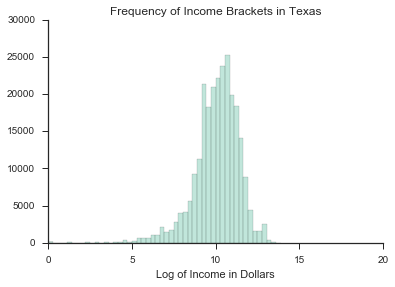

In [9]:
# Adjust incomes without weights
newIncomes = x86['PINCP']
newIncomes = newIncomes.dropna()
newIncomes = newIncomes [newIncomes > 0] # ignoring incomes of 0
newIncomes2 = np.log(newIncomes.values)
print(newIncomes2.size)

fig = plt.figure()
temp = fig.add_subplot(111) 
temp.set_title('Frequency of Income Brackets in Texas')
temp.set_xlim(0, 20)

sns.distplot(newIncomes2, kde=False, bins=50, ax = temp, axlabel = "Log of Income in Dollars")
sns.despine()

In [10]:
data = x86.copy()
data = data[data['ESR'].isin([1, 4])]
data.head()

,Unnamed: 0_x,RT_x,SERIALNO,SPORDER,PUMA_x,ST_x,ADJINC_x,PWGTP,AGEP,CIT,...,wgtp71,wgtp72,wgtp73,wgtp74,wgtp75,wgtp76,wgtp77,wgtp78,wgtp79,wgtp80
0,150707,P,11,1,7301,6,1007549,40,21,1,...,0,0,0,0,0,0,0,0,0,0
5,150712,P,16,2,8503,6,1007549,97,21,1,...,23,127,132,23,87,123,21,23,72,85
6,150713,P,22,1,300,6,1007549,233,22,1,...,175,220,476,380,240,188,145,284,234,221
7,150714,P,22,2,300,6,1007549,123,22,1,...,175,220,476,380,240,188,145,284,234,221
9,150716,P,32,2,2901,6,1007549,21,54,4,...,16,35,21,33,32,6,20,7,16,21


In [11]:
#rntp, valp, rmsp, taxp(?), smocp, bdsp(not as good), smp(okay)
features = ['PINCP', 'AGEP', 'MAR', 'SCHL', 'SEX', 'FOD1P', 'INDP', 'NATIVITY', 'OCCP', 'RAC1P', 'RMSP', 'SMOCP', 'RNTP', 'VALP']
newData = data.copy()
newData = data[features]
newData.head()

,PINCP,AGEP,MAR,SCHL,SEX,FOD1P,INDP,NATIVITY,OCCP,RAC1P,RMSP,SMOCP,RNTP,VALP
0,31004,21,3,16,2,NaN,9770,1,9820,1,NaN,NaN,NaN,NaN
5,13000,21,5,19,2,NaN,8090,1,5940,2,7,3106,NaN,370000
6,13000,22,5,16,2,NaN,8780,1,9610,1,3,NaN,680,NaN
7,37000,22,5,16,1,NaN,1370,1,4250,1,3,NaN,680,NaN
9,200000,54,1,21,1,2599,8560,2,500,1,10,1597,NaN,700000


In [12]:
totalRich = newData[newData['PINCP']>=100000]
print(totalRich.shape)

(23632, 14)


In [13]:
smocpNP = newData['SMOCP'].as_matrix()
smocpAverage = np.nanmean(smocpNP)
print(smocpAverage)

rmspNP = newData['RMSP'].as_matrix()
rmspAverage = np.nanmean(rmspNP)
print(rmspAverage)

rntpNP = newData['RNTP'].as_matrix()
rntpAverage = np.nanmean(rntpNP)
print(rntpAverage)

valpNP = newData['VALP'].as_matrix()
valpAverage = np.nanmean(valpNP)
print(valpAverage)

2141.15602116
5.73123973911
1333.5657979
504449.247604


In [14]:
newData['FOD1P'].fillna(0, inplace=True)
newData['INDP'].fillna(0, inplace=True)
newData['OCCP'].fillna(0, inplace=True)
newData['SMOCP'].fillna(smocpAverage, inplace=True)
newData['RMSP'].fillna(rmspAverage, inplace=True)
newData['RNTP'].fillna(rntpAverage, inplace=True)
newData['VALP'].fillna(0, inplace=True)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
newData.head()

,PINCP,AGEP,MAR,SCHL,SEX,FOD1P,INDP,NATIVITY,OCCP,RAC1P,RMSP,SMOCP,RNTP,VALP
0,31004,21,3,16,2,0,9770,1,9820,1,5.73124,2141.156021,1333.565798,0
5,13000,21,5,19,2,0,8090,1,5940,2,7.00000,3106.000000,1333.565798,370000
6,13000,22,5,16,2,0,8780,1,9610,1,3.00000,2141.156021,680.000000,0
7,37000,22,5,16,1,0,1370,1,4250,1,3.00000,2141.156021,680.000000,0
9,200000,54,1,21,1,2599,8560,2,500,1,10.00000,1597.000000,1333.565798,700000


In [15]:
newData['MONTHLYCOSTS'] = newData.SMOCP + newData.RNTP
newData.head()

,PINCP,AGEP,MAR,SCHL,SEX,FOD1P,INDP,NATIVITY,OCCP,RAC1P,RMSP,SMOCP,RNTP,VALP,MONTHLYCOSTS
0,31004,21,3,16,2,0,9770,1,9820,1,5.73124,2141.156021,1333.565798,0,3474.721819
5,13000,21,5,19,2,0,8090,1,5940,2,7.00000,3106.000000,1333.565798,370000,4439.565798
6,13000,22,5,16,2,0,8780,1,9610,1,3.00000,2141.156021,680.000000,0,2821.156021
7,37000,22,5,16,1,0,1370,1,4250,1,3.00000,2141.156021,680.000000,0,2821.156021
9,200000,54,1,21,1,2599,8560,2,500,1,10.00000,1597.000000,1333.565798,700000,2930.565798


In [16]:
del newData['SMOCP']
del newData['RNTP']
newData.head()

,PINCP,AGEP,MAR,SCHL,SEX,FOD1P,INDP,NATIVITY,OCCP,RAC1P,RMSP,VALP,MONTHLYCOSTS
0,31004,21,3,16,2,0,9770,1,9820,1,5.73124,0,3474.721819
5,13000,21,5,19,2,0,8090,1,5940,2,7.00000,370000,4439.565798
6,13000,22,5,16,2,0,8780,1,9610,1,3.00000,0,2821.156021
7,37000,22,5,16,1,0,1370,1,4250,1,3.00000,0,2821.156021
9,200000,54,1,21,1,2599,8560,2,500,1,10.00000,700000,2930.565798


In [17]:
#del newData['SCHL']
#del newData['FOD1P']
#xs = newData.values
#corr = np.corrcoef(xs, rowvar=0)
#w, v = np.linalg.eig(corr)
#w

In [18]:
mar_dummies = pd.get_dummies(newData.MAR, prefix="MAR")
newData = newData.join(mar_dummies)
del newData['MAR']

schl_dummies = pd.get_dummies(newData.SCHL, prefix="SCHL")
newData = newData.join(schl_dummies)
del newData['SCHL']

sex_dummies = pd.get_dummies(newData.SEX, prefix="SEX")
newData = newData.join(sex_dummies)
del newData['SEX']

#newData['FOD1P'].fillna(0, inplace=True)
newData['FOD1P'] = newData['FOD1P'].apply(lambda x: int(x/100))
fod_dummies = pd.get_dummies(newData.FOD1P, prefix="FOD1P")
newData = newData.join(fod_dummies)
del newData['FOD1P']

#newData['INDP'].fillna(0, inplace=True)
newData['INDP'] = newData['INDP'].apply(lambda x: int(x/100))
indp_dummies = pd.get_dummies(newData.INDP, prefix="INDP")
newData = newData.join(indp_dummies)
del newData['INDP']

nat_dummies = pd.get_dummies(newData.NATIVITY, prefix="NATIVITY")
newData = newData.join(nat_dummies)
del newData['NATIVITY']

#newData['OCCP'].fillna(0, inplace=True)
newData['OCCP'] = newData['OCCP'].apply(lambda x: int(x/100))
occp_dummies = pd.get_dummies(newData.OCCP, prefix="OCCP")
newData = newData.join(occp_dummies)
del newData['OCCP']

rac_dummies = pd.get_dummies(newData.RAC1P, prefix="RAC1P")
newData = newData.join(rac_dummies)
del newData['RAC1P']
newData.head()

,PINCP,AGEP,RMSP,VALP,MONTHLYCOSTS,MAR_1,MAR_2,MAR_3,MAR_4,MAR_5,...,OCCP_98,RAC1P_1,RAC1P_2,RAC1P_3,RAC1P_4,RAC1P_5,RAC1P_6,RAC1P_7,RAC1P_8,RAC1P_9
0,31004,21,5.73124,0,3474.721819,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
5,13000,21,7.00000,370000,4439.565798,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6,13000,22,3.00000,0,2821.156021,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
7,37000,22,3.00000,0,2821.156021,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
9,200000,54,10.00000,700000,2930.565798,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [19]:
newData['PINCP_100000'] = newData.PINCP > 100000
del newData['PINCP']
newData.head()

,AGEP,RMSP,VALP,MONTHLYCOSTS,MAR_1,MAR_2,MAR_3,MAR_4,MAR_5,SCHL_1.0,...,RAC1P_1,RAC1P_2,RAC1P_3,RAC1P_4,RAC1P_5,RAC1P_6,RAC1P_7,RAC1P_8,RAC1P_9,PINCP_100000
0,21,5.73124,0,3474.721819,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,False
5,21,7.00000,370000,4439.565798,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,False
6,22,3.00000,0,2821.156021,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,False
7,22,3.00000,0,2821.156021,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,False
9,54,10.00000,700000,2930.565798,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,True


In [20]:
len(newData.columns)

277

In [21]:
y = newData.PINCP_100000
del newData['PINCP_100000']

In [22]:
def plot_roc(model):
    model.fit(X_train, y_train)
    predictions = model.predict_proba(X_test)
    predictions = [x[1] for x in predictions]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='Ridge AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
def plot_roc1(model):
    model.fit(X_train, y_train)
    predictions = model.predict_proba(X_test)
    predictions = [x[1] for x in predictions]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic for Logistic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='Ridge AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
def plot_roc2(model):
    model.fit(X_train, y_train)
    predictions = model.predict_proba(X_test)
    predictions = [x[1] for x in predictions]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic for Logistic')
    plt.plot(false_positive_rate, true_positive_rate, 'g',
    label='Lasso AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Below 100000', 'Above 100000'], rotation=45)
    plt.yticks(tick_marks, ['Below 100000', 'Above 100000'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def accuracies(cm):
    totals = np.sum(cm, 1)
    no_acc = cm[0, 0] / totals[0]
    yes_acc = cm[1, 1] / totals[1]
    print("Below 100000 Acc: {0}".format(no_acc))
    print("Above 100000 Acc: {0}".format(yes_acc))
    print("Avg Acc: {0}".format((no_acc + yes_acc)/2))
    

def run_model(model):
    clf = model
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    plot_confusion_matrix(cm)
    accuracies(cm)

In [23]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newData, y, test_size=0.33, random_state=42)

[[27136 18240]
 [ 1851  5246]]
Below 100000 Acc: 0.5980253878702397
Above 100000 Acc: 0.7391855713681837
Avg Acc: 0.6686054796192118


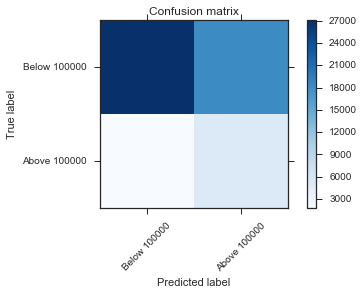

In [24]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix

clfRidge = LogisticRegression(penalty='l2', C=1000, class_weight='balanced')
run_model(clfRidge)

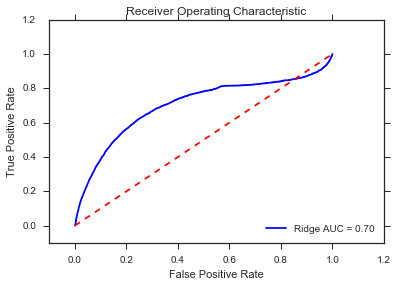

In [25]:
from sklearn.metrics import roc_curve, auc
plot_roc(clfRidge)

[[27136 18240]
 [ 1851  5246]]
Below 100000 Acc: 0.5980253878702397
Above 100000 Acc: 0.7391855713681837
Avg Acc: 0.6686054796192118
{'C': 0.001}


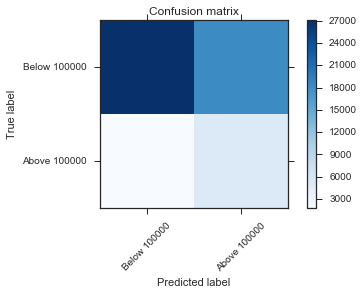

In [26]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

def cm_loss(estimator, X, y):
    predictions = estimator.predict(X)
    cm = confusion_matrix(y, predictions)
    totals = np.sum(cm, 1)
    no_acc = cm[0, 0] / totals[0]
    yes_acc = cm[1, 1] / totals[1]
    return (no_acc + yes_acc)/2


lr = LogisticRegression(penalty='l2', class_weight='balanced')
parameters = {'C':[.001, .01, 1, 10, 100]}
clfRidge = GridSearchCV(lr, parameters, scoring=cm_loss, cv=7)
clfRidge.fit(X_train, y_train)
run_model(clfRidge.best_estimator_)
print(clfRidge.best_params_)

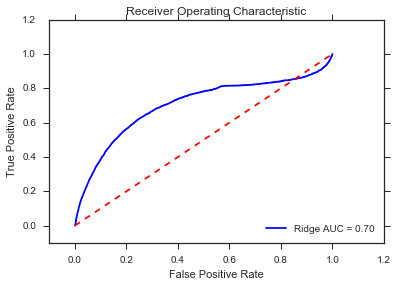

In [27]:
plot_roc(clfRidge.best_estimator_)

[[36924  8452]
 [  989  6108]]
Below 100000 Acc: 0.8137341325811002
Above 100000 Acc: 0.8606453431027195
Avg Acc: 0.8371897378419098
{'C': 10}


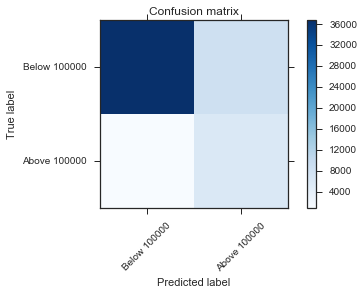

In [28]:
lr = LogisticRegression(penalty='l1', class_weight='balanced')
parameters = {'C':[.001, .01, 1, 10, 100, 1000]}
clfLasso = GridSearchCV(lr, parameters, scoring=cm_loss, cv=5)
clfLasso.fit(X_train, y_train)
run_model(clfLasso.best_estimator_)
print(clfLasso.best_params_)

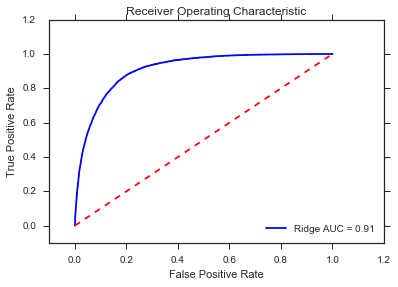

In [29]:
plot_roc(clfLasso.best_estimator_)

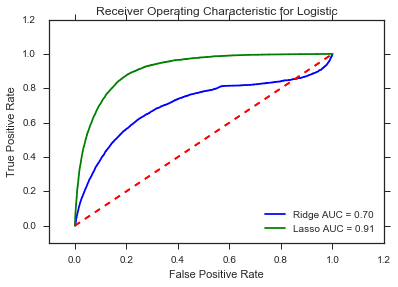

In [30]:
plot_roc1(clfRidge.best_estimator_)
plot_roc2(clfLasso.best_estimator_)

## LDA AND QDA

### LDA

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

[[43142  2234]
 [ 3405  3692]]
Below 100000 Acc: 0.9507669252468265
Above 100000 Acc: 0.5202198111878258
Avg Acc: 0.7354933682173261
{'tol': 0.001}


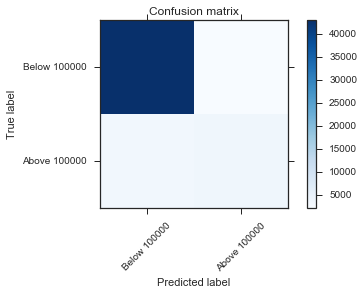

In [32]:
ldaModel = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage='auto')
parameters = {'tol':[0.001]}
clf2 = GridSearchCV(ldaModel, parameters, scoring=cm_loss, cv=5)
clf2.fit(X_train, y_train)
run_model(clf2.best_estimator_)
print(clf2.best_params_)

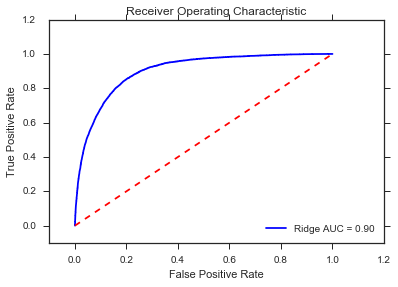

In [33]:
plot_roc(clf2.best_estimator_)

### QDA

In [34]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

[[34635 10741]
 [ 2065  5032]]
Below 100000 Acc: 0.7632889633286318
Above 100000 Acc: 0.7090319853459208
Avg Acc: 0.7361604743372763
{'reg_param': 0.9}


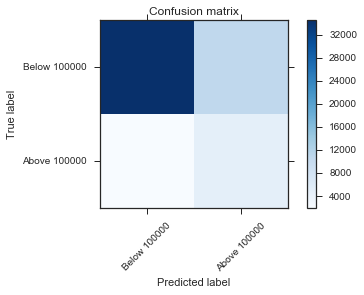

In [35]:
qdaModel = QuadraticDiscriminantAnalysis()
parameters = {'reg_param':[0.9]} #0.9 is optimal
clf3 = GridSearchCV(qdaModel, parameters, scoring=cm_loss, cv=5)
clf3.fit(X_train, y_train)
run_model(clf3.best_estimator_)
print(clf3.best_params_)

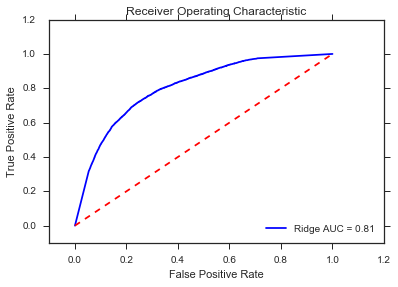

In [36]:
plot_roc(clf3.best_estimator_)

### SVC 

In [37]:
from sklearn.svm import SVC

In [38]:
mod = SVC(max_iter=10000, kernel = 'poly', degree = 3, class_weight='balanced')

[[44526   850]
 [ 6108   989]]
Below 100000 Acc: 0.9812676304654443
Above 100000 Acc: 0.13935465689728055
Avg Acc: 0.5603111436813624


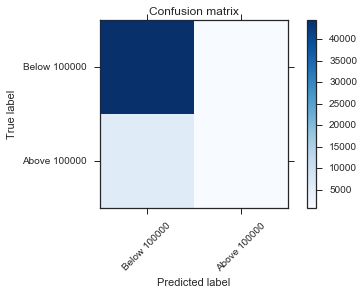

In [39]:
run_model(mod)

In [40]:
mod = SVC(max_iter=20000, kernel = 'poly', degree = 3, class_weight='balanced')

[[  599 44777]
 [  712  6385]]
Below 100000 Acc: 0.013200811001410438
Above 100000 Acc: 0.8996759194025644
Avg Acc: 0.45643836520198744


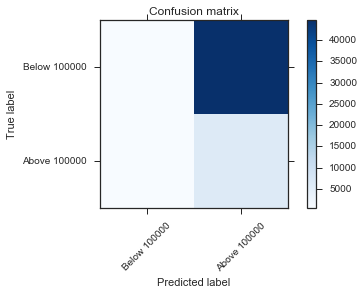

In [41]:
run_model(mod)

In [42]:
mod = SVC(max_iter=30000, kernel = 'poly', degree = 3, coef0 = 1, class_weight='balanced')

[[  870 44506]
 [  998  6099]]
Below 100000 Acc: 0.019173131170662907
Above 100000 Acc: 0.8593772016344935
Avg Acc: 0.4392751664025782


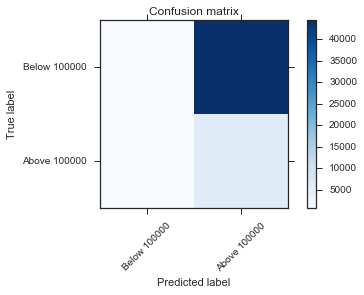

In [43]:
run_model(mod)

### SVC with SGDClassifier

In [44]:
from sklearn.linear_model import SGDClassifier

In [45]:
mod = SGDClassifier(n_jobs=-1, shuffle=True, penalty = 'l2', class_weight='balanced', average=1)
parameters = {'l1_ratio':[0.85], 'alpha':[3.5],'eta0':[1.5], 'power_t':[3.5]}

[[19699 25677]
 [ 1332  5765]]
Below 100000 Acc: 0.43412817348377997
Above 100000 Acc: 0.8123150627025504
Avg Acc: 0.6232216180931651
SGDClassifier(alpha=3.5, average=1, class_weight='balanced', epsilon=0.1,
       eta0=1.5, fit_intercept=True, l1_ratio=0.85,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=-1,
       penalty='l2', power_t=3.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)


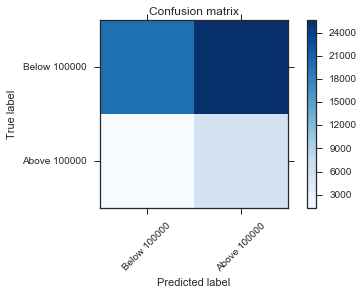

In [46]:
clf4 = GridSearchCV(mod, parameters, scoring=cm_loss, cv=5)
clf4.fit(X_train, y_train)
run_model(clf4.best_estimator_)
print(clf4.best_estimator_)

In [47]:
#plot_roc(clf)

## Initial Ensemble Testing

[[39953  5423]
 [ 1856  5241]]
Below 100000 Acc: 0.8804874823695346
Above 100000 Acc: 0.7384810483302804
Avg Acc: 0.8094842653499075


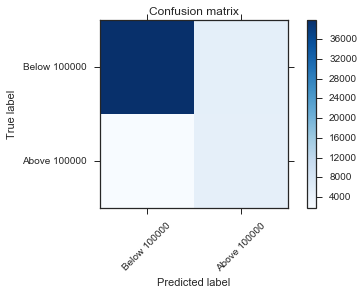

In [49]:
from sklearn import cross_validation
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('lr', clfLasso), ('lda', clf2), ('qda', clf3)], voting='hard')
eclf.fit(X_train, y_train)
run_model(eclf)

[[40781  4595]
 [ 2341  4756]]
Below 100000 Acc: 0.8987350141043724
Above 100000 Acc: 0.6701423136536565
Avg Acc: 0.7844386638790144


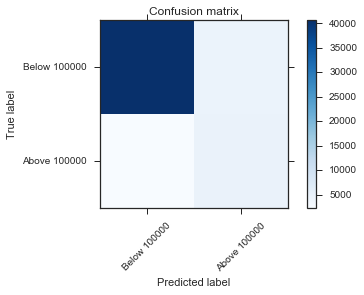

In [50]:
from sklearn import cross_validation
from sklearn.ensemble import VotingClassifier
eclfWithSVC = VotingClassifier(estimators=[('lr', clfLasso), ('lda', clf2), ('qda', clf3),('svc',clf4)], voting='hard')
eclfWithSVC.fit(X_train, y_train)
run_model(eclfWithSVC)

### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

[[37773  7603]
 [ 1302  5795]]
Below 100000 Acc: 0.8324444640338505
Above 100000 Acc: 0.8165422009299704
Avg Acc: 0.8244933324819105
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


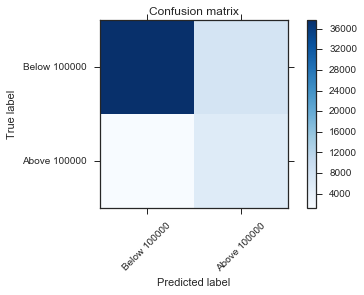

In [52]:
model = RandomForestClassifier()
parameters = {'n_estimators':[100], 'max_depth':[15], 'max_features': ['auto'], 'class_weight':['balanced']}
clf5 = GridSearchCV(model, parameters, scoring=cm_loss, cv=5)
clf5.fit(X_train, y_train)
run_model(clf5.best_estimator_)
print(clf5.best_estimator_)

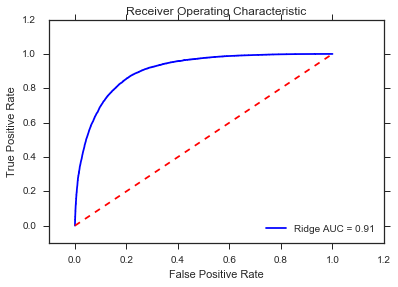

In [53]:
plot_roc(clf5)

### Boosting

In [54]:
baseModel = RandomForestClassifier(n_estimators = 10, max_depth = 5, class_weight = 'balanced', max_features = 'auto')

In [55]:
from sklearn.ensemble import AdaBoostClassifier
abClass = AdaBoostClassifier(base_estimator = baseModel)
#parameters = {'n_estimators':[100], 'learning_rate': [1]}
#clf = GridSearchCV(model, parameters, scoring=cm_loss, cv=5)
abClass.fit(X_train, y_train)
#run_model(clf.best_estimator_)
#print(clf.best_estimator_)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

[[37463  7913]
 [  972  6125]]
Below 100000 Acc: 0.825612658674189
Above 100000 Acc: 0.8630407214315908
Avg Acc: 0.8443266900528898


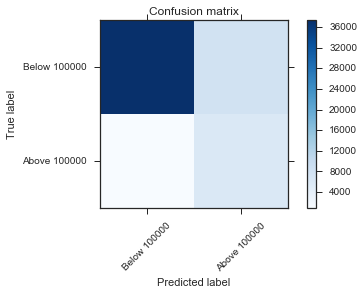

In [56]:
run_model(abClass)

### Lift Curve

In [57]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [58]:
predictions = abClass.predict_proba(X_test)
#print(predictions)
#type(predictions)
tempVal = column(predictions, 1)

#type(np.array(tempVal))
fi = zip(y_test.values, np.array(tempVal))
fi_sort = sorted(fi, key=lambda x: x[1], reverse=True)


In [59]:
trueProbCount = 0
for x in y_test.values:
    if(x==True):
        trueProbCount+=1
trueProbCount/36715    

0.19329974125017024

In [60]:
len(fi_sort)

52473

In [61]:
decileCount = 0
trueCount = 0
falseCount = 0
listTrueAccuracy = []
listFalseAccuracy = []
for pred, prob in fi_sort:
    if(decileCount == 3671):
        listTrueAccuracy.append(trueCount)
        listFalseAccuracy.append(falseCount)
        decileCount = 0
        trueCount = 0
        falseCount = 0
    if(pred == True and prob > 0.5):
        trueCount+=1
    elif(pred == False and prob > 0.5):
        falseCount+=1
    decileCount+=1

In [62]:
print(listTrueAccuracy)
print(listFalseAccuracy)
listTruePercent = []
listFalsePercent = []

for pred in listTrueAccuracy:
    listTruePercent.append(pred/sum(listTrueAccuracy))

for pred in listFalseAccuracy:
    listFalsePercent.append(pred/sum(listFalseAccuracy))
    
print(listTruePercent)
print(listFalsePercent)

[2724, 1768, 1083, 550, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[947, 1903, 2588, 2475, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.44473469387755105, 0.2886530612244898, 0.17681632653061224, 0.08979591836734693, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.11967648173891066, 0.24049033236446354, 0.3270567420700114, 0.31277644382661446, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


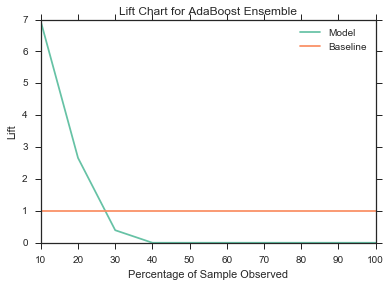

In [63]:
line_up, = plt.plot([10,20,30,40,50,60,70,80,90, 100],[69.4/10, 26.6/10, 3.93/10, 0, 0, 0, 0,0,0,0], label='Model')
line_down, = plt.plot([10,20,30,40,50,60,70,80,90, 100],[1, 1, 1, 1, 1, 1, 1, 1, 1,1], label='Baseline')
plt.legend(handles=[line_up, line_down])
plt.xlabel('Percentage of Sample Observed')
plt.ylabel('Lift')
plt.title('Lift Chart for AdaBoost Ensemble')

### ROC for Adaboost

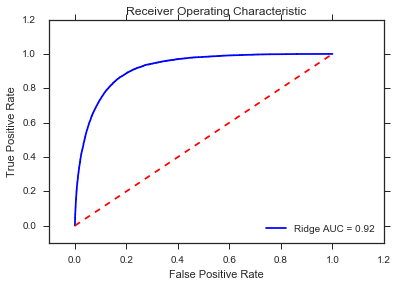

In [64]:
plot_roc(abClass)

### XGBoost 

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier()
clf = GridSearchCV(xgb_model, {'max_depth': [10],
                                   'n_estimators': [100]}, verbose=1, n_jobs=-1)
clf.fit(X_train, y_train)
run_model(clf.best_estimator_)

### Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 10)
clf.fit(X_train, y_train)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file='tree.dot')   

In [ ]:
!dot -Tpng tree.dot -o tree.png

In [ ]:
from IPython.display import Image
Image(filename='tree.png') 

## Ensemble

[[38404  6972]
 [ 1399  5698]]
Below 100000 Acc: 0.8463504936530324
Above 100000 Acc: 0.8028744539946456
Avg Acc: 0.824612473823839


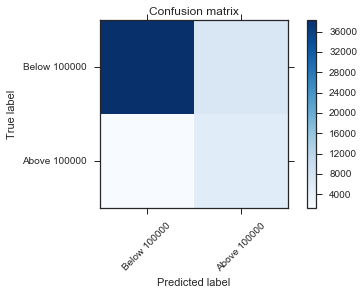

In [66]:
from sklearn import cross_validation
from sklearn.ensemble import VotingClassifier
eclf5comp = VotingClassifier(estimators=[('lr', clfLasso), ('lda', clf2), ('qda', clf3),('svc',clf4),('tree', clf5)], voting='hard')
eclf5comp.fit(X_train, y_train)
run_model(eclf5comp)

In [ ]:
from sklearn import cross_validation
from sklearn.ensemble import VotingClassifier
eclf4comp = VotingClassifier(estimators=[('lr', clfLasso), ('lda', clf2), ('qda', clf3),('tree', clf5)], voting='soft')
eclf4comp.fit(X_train, y_train)
run_model(eclf4comp)

In [ ]:
plot_roc(eclf4comp)

In [67]:
def plot_roc2000(model):
    model.fit(X_train, y_train)
    predictions = model.predict_proba(X_test)
    predictions = [x[1] for x in predictions]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='Logistic with Lasso AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    test1 = plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [68]:
def plot_roc3000(model):
    model.fit(X_train, y_train)
    predictions = model.predict_proba(X_test)
    predictions = [x[1] for x in predictions]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'g',
    label='LDA AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [69]:
def plot_roc4000(model):
    model.fit(X_train, y_train)
    predictions = model.predict_proba(X_test)
    predictions = [x[1] for x in predictions]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'y',
    label='QDA AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [70]:
def plot_roc5000(model):
    model.fit(X_train, y_train)
    predictions = model.predict_proba(X_test)
    predictions = [x[1] for x in predictions]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'r',
    label='Random Forest AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

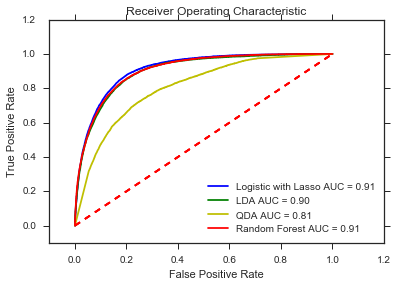

In [71]:
plot_roc2000(clfLasso)
plot_roc3000(clf2)
plot_roc4000(clf3)
plot_roc5000(clf5)